#importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Input Image

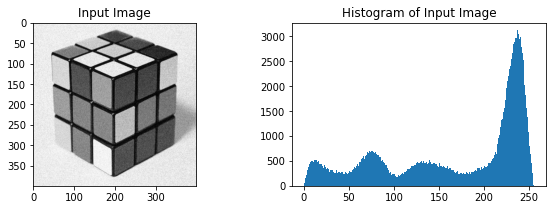

In [2]:
path = "../img/rubiks_cube.png"
inp_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
inp_img = cv2.resize(inp_img, (400,400))
figure, axis = plt.subplots(1,2, figsize=(10, 3))
axis[0].set_title("Input Image")
axis[0].imshow(inp_img, "gray")
axis[1].set_title("Histogram of Input Image")
axis[1].hist(inp_img.ravel(), 256,[0,256])
plt.show()

#Creating gaussian function(Normal Distribution)

In [3]:
def _generate_gaussian_distribution( inp_img,miu=128, sigma=40):
    gauss_func = np.random.normal(miu, sigma, size=(inp_img.shape[0], inp_img.shape[1]))
    gauss_func = np.round(gauss_func)
    gauss_func = gauss_func.astype(np.uint8)
    gauss_func[gauss_func>255]=255
    gauss_func[gauss_func<0]=0
    return gauss_func

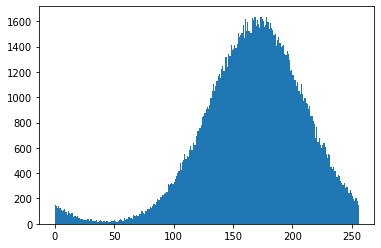

In [4]:
# miu = int(input("Enter the center offset(miu): "))
# sigma = int(input("Enter the sigma value: "))
gauss_func_1 = _generate_gaussian_distribution(inp_img, 170, 40)
plt.hist(gauss_func_1.ravel(),bins=256, range=[0,256])
plt.show()


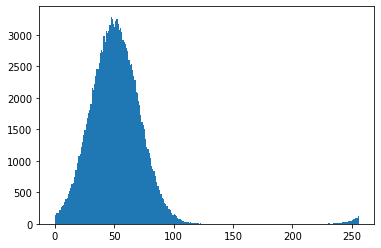

In [5]:
# miu = int(input("Enter the center offset(miu): "))
# sigma = int(input("Enter the sigma value: "))
gauss_func_2 = _generate_gaussian_distribution(inp_img,50,20)
plt.hist(gauss_func_2.ravel(),bins=256, range=[0,256])
plt.show()


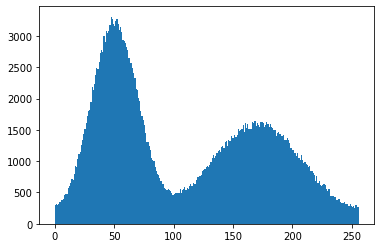

In [6]:

gauss_func = np.concatenate((gauss_func_1,gauss_func_2), axis=0)
plt.hist(gauss_func.ravel(),bins=256, range=[0,256])
plt.show()

#Creating Required Helper Function

#probability distibution function of the intensity

In [7]:
def _get_pdf(img):
    pdf = [0.0 for _ in range(256)]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = img.item(i,j)
            pdf[x]+=1
    pdf=np.array(pdf)/(img.shape[0]*img.shape[1])
    return pdf

#cumulative distibution function of the intensity


In [8]:
def _get_cdf(pdf):
    cdf = [0.0 for _ in range(256)]
    cumulative_sum = 0
    for i in range(256):
        cumulative_sum+=pdf[i]
        cdf[i]=cumulative_sum
    return cdf

#Histogram Matching(Specification)

#PDF of Input image and Gaussian Function

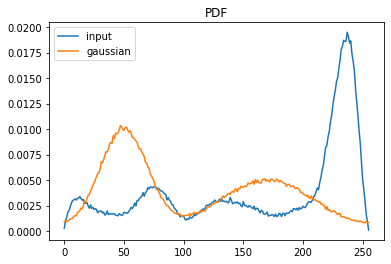

In [9]:
pdf_input = _get_pdf(inp_img)
pdf_gaussian = _get_pdf(gauss_func)
plt.plot(pdf_input,label="input")
plt.plot(pdf_gaussian, label="gaussian")
plt.title("PDF")
plt.legend(loc="upper left")
plt.show()

#CDF of Input and Gaussian Function

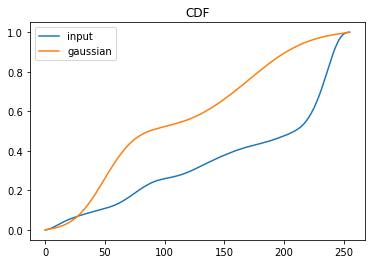

In [10]:
cdf_input = _get_cdf(pdf_input)
cdf_gaussian=  _get_cdf(pdf_gaussian)
plt.plot(cdf_input, label="input")
plt.plot(cdf_gaussian, label="gaussian")
plt.legend(loc="upper left")
plt.title("CDF")
plt.show()

#Matching the histogram of input image according to the gaussian function

In [11]:
M = np.zeros((256,1), dtype="uint8")
for _ in range(256):
    diff = abs(cdf_input[_]-cdf_gaussian)
    min_diff_idx = np.argmin(diff)
    M[_] = min_diff_idx

#Generating Output Image

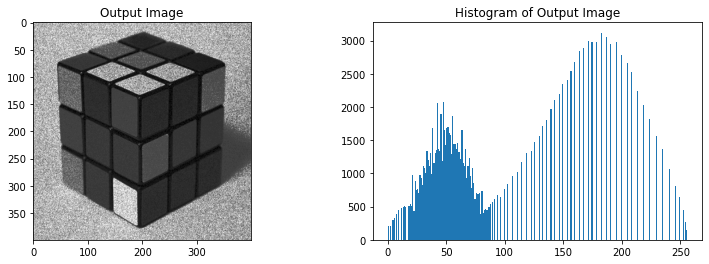

In [12]:
output = M[inp_img.ravel()]
output = output.reshape(inp_img.shape)
pdf_output = _get_pdf(output)
cdf_output = _get_cdf(pdf_output)
figure, axis = plt.subplots(1,2, figsize=(13,4))
axis[0].imshow(output, "gray")
axis[0].set_title("Output Image")
axis[1].hist(output.ravel(),256,[0,256])
axis[1].set_title("Histogram of Output Image")
plt.show()

#Comparision between Input and Output 

#Images

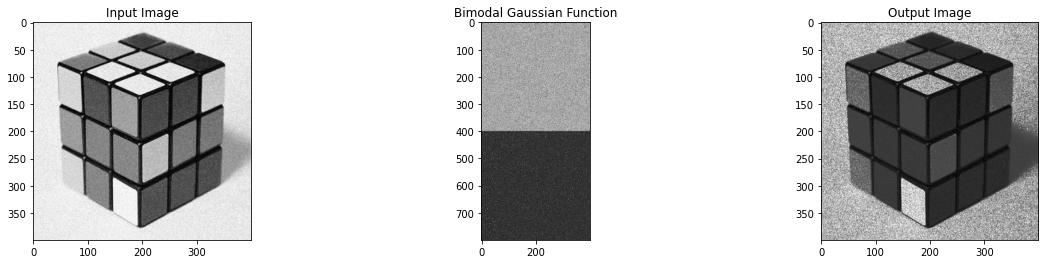

In [13]:
figure , axis = plt.subplots(1,3, figsize=(20,4))
axis[0].set_title("Input Image")
axis[0].imshow(inp_img, "gray")
axis[1].set_title("Bimodal Gaussian Function")
axis[1].imshow(gauss_func, "gray")
axis[2].set_title("Output Image")
axis[2].imshow(output, "gray")
plt.show()
# cv2.imshow("input", inp_img)
# cv2.imshow("output", output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#Histogram

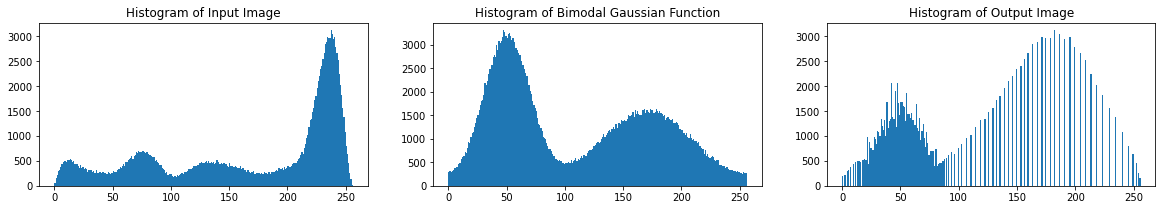

In [14]:
figure , axis = plt.subplots(1,3, figsize=(20,3))
axis[0].set_title("Histogram of Input Image")
axis[0].hist(inp_img.ravel(),256,[0,256])
axis[1].set_title("Histogram of Bimodal Gaussian Function")
axis[1].hist(gauss_func.ravel(),256,[0,256])
axis[2].set_title("Histogram of Output Image")
axis[2].hist(output.ravel(),256,[0,256])
plt.show()

#CDF

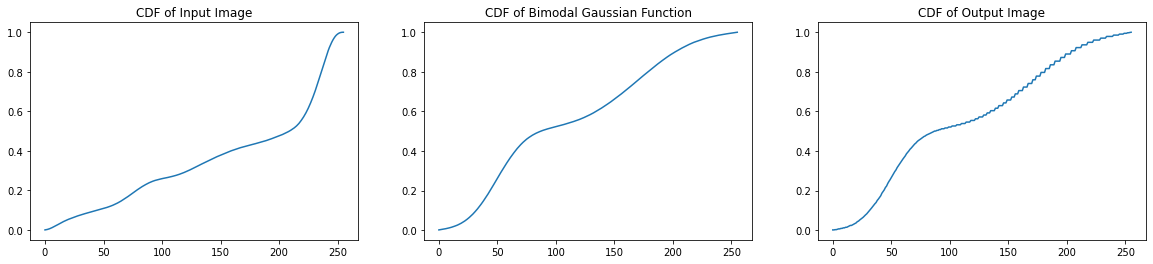

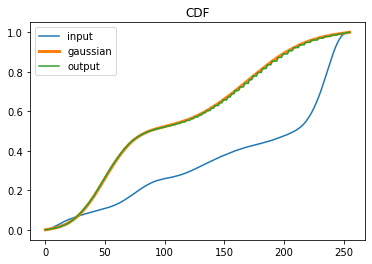

In [15]:
figure , axis = plt.subplots(1,3, figsize=(20,4))
axis[0].set_title("CDF of Input Image")
axis[0].plot(cdf_input)
axis[1].set_title("CDF of Bimodal Gaussian Function")
axis[1].plot(cdf_gaussian)
axis[2].set_title("CDF of Output Image")
axis[2].plot(cdf_output)
plt.show()

plt.plot(cdf_input, label="input")
plt.plot(cdf_gaussian, label="gaussian",linewidth="3")
plt.plot(cdf_output,label="output")
plt.title("CDF")
plt.legend(loc="upper left")
plt.show()